In [1]:
# The jupyter script is used to carry out the analysis of the single run
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# from the music therapy study using a 12 seconds sliding window
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [2]:
from helper import*
from params import*

In [3]:
# SQL parameters
tableName_1 = 'MH_13_ES1_task1'
tableName_2 = 'MH_13_ES2_task1'
query_1 = ("% s % s"%('SELECT * FROM', tableName_1))
query_2 = ("% s % s"%('SELECT * FROM', tableName_2))

In [4]:
# establish connection with music_therapy_eeg database
db_connection = create_db_connection(hostName,userName,userPassword,databaseName)
data_1 = df_to_table_query(db_connection,query_1)
data_2 = df_to_table_query(db_connection,query_2)

MySQL Database connection successful
Query successful
Query successful


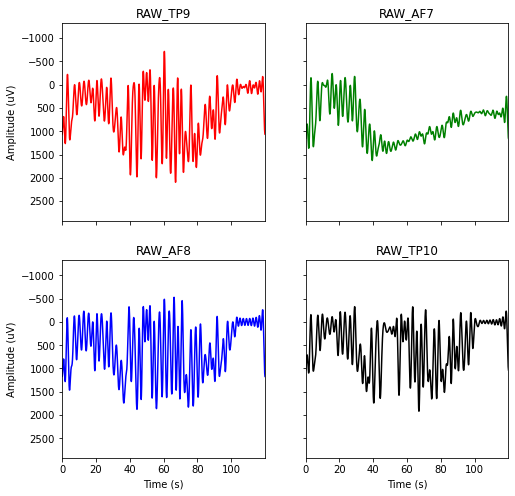

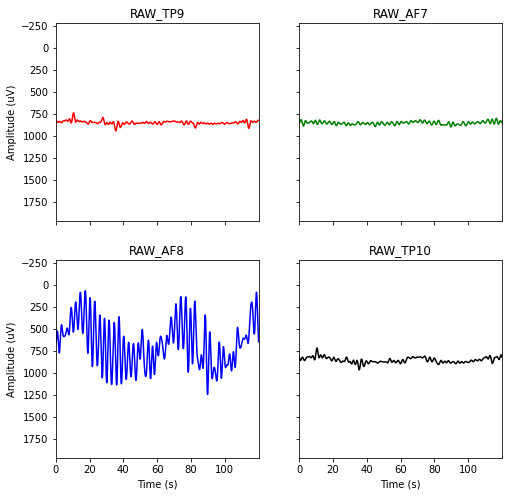

In [5]:
# transform sql extracted table to raw eeg data
rawEEG_1 = (singleTransformToRawEEG(data_1,fs,collection_time,fs_setting))[0]
rawEEG_2 = (singleTransformToRawEEG(data_2,fs,collection_time,fs_setting))[0]
time_s = (singleTransformToRawEEG(data_1,fs,collection_time,fs_setting))[1]
plots(time_s,rawEEG_1,plotTitles,figSize,pltColor)
plots(time_s,rawEEG_2,plotTitles,figSize,pltColor)

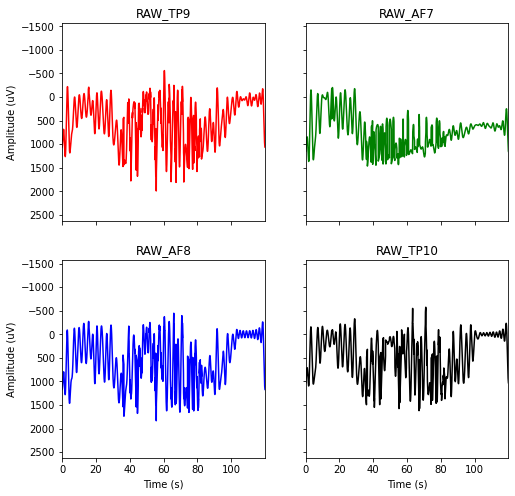

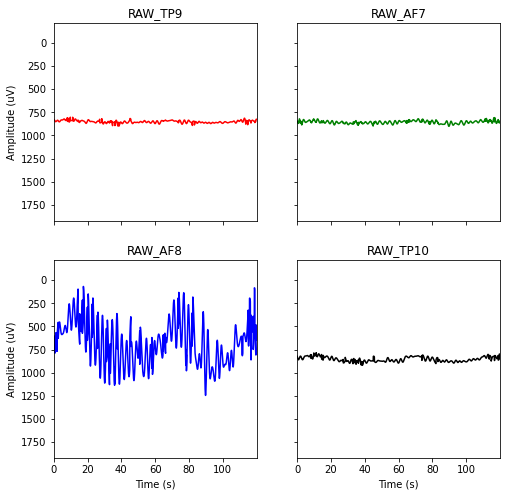

In [6]:
# compute independent comonent analysis on raw eeg data
ica_data_1 = customICA(rawEEG_1,tuneval)
ica_data_2 = customICA(rawEEG_2,tuneval)
plots(time_s,ica_data_1,plotTitles,figSize,pltColor)
plots(time_s,ica_data_2,plotTitles,figSize,pltColor)

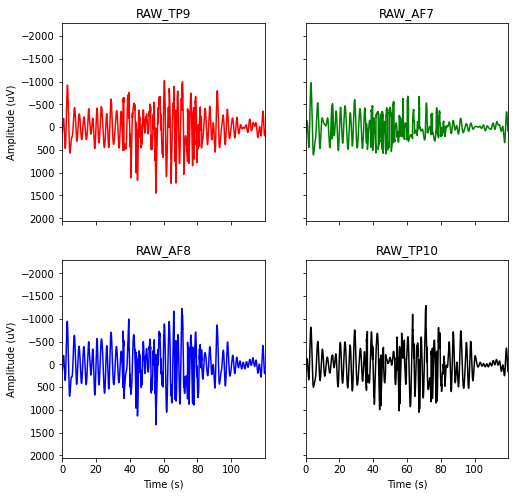

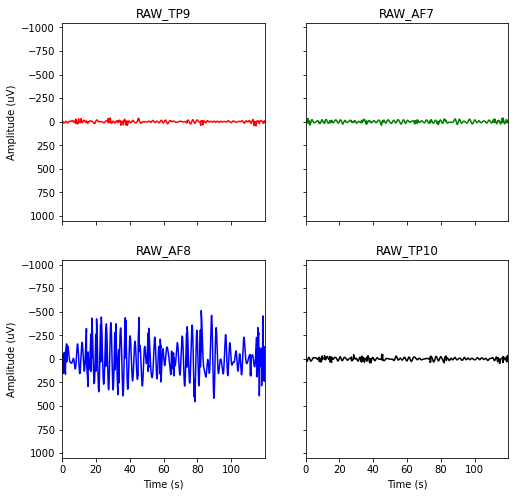

In [7]:
# Filters: notch filter and bandpass filter
noc=filters()
notch_data_1 = noc.notch(ica_data_1,line,fs,Q)
notch_data_2 = noc.notch(ica_data_2,line,fs,Q)
bp = filters()
bpData_1 = bp.butterBandPass(notch_data_1,lowcut,highcut,fs,order)
bpData_2 = bp.butterBandPass(notch_data_2,lowcut,highcut,fs,order)
plots(time_s,bpData_1,plotTitles,figSize,pltColor)
plots(time_s,bpData_2,plotTitles,figSize,pltColor)

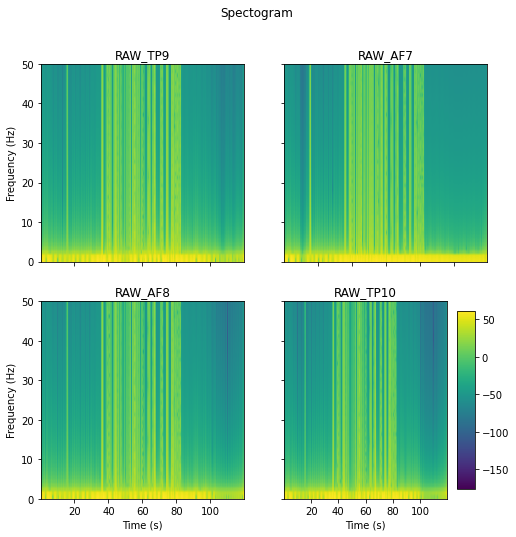

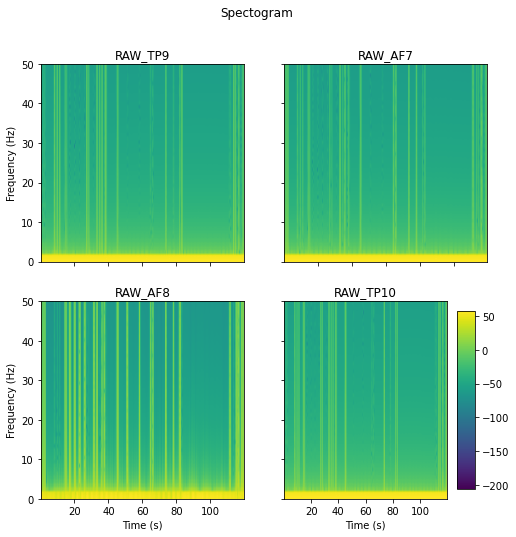

In [8]:
spectogramPlot(bpData_1,fs,nfft,noverlap,figSize,plotTitles)
spectogramPlot(bpData_2,fs,nfft,noverlap,figSize,plotTitles)

In [9]:
# run sliding window on bandpass filtered data
rw_data_1 = rollingWindow(bpData_1,window_size,step_size)
rw_data_2 = rollingWindow(bpData_2,window_size,step_size)

In [10]:
# compute power spectrum of each window per channel
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

    # compute average band power for timepoint 1
deltaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,delta_low,delta_high,win)
thetaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,theta_low,theta_high,win)
alphaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,beta_low,beta_high,win)
gammaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,gamma_low,gamma_high,win)

    # compute average band power for timepoint 2
deltaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,delta_low,delta_high,win)
thetaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,theta_low,theta_high,win)
alphaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,beta_low,beta_high,win)
gammaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,gamma_low,gamma_high,win)

In [11]:
# paired T-test
ttest_delta = pairedTTest(deltaAvgBandPower_1,deltaAvgBandPower_2, show_output=True,variableName='delta',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta = pairedTTest(thetaAvgBandPower_1,thetaAvgBandPower_2, show_output=True,variableName='theta',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha = pairedTTest(alphaAvgBandPower_1,alphaAvgBandPower_2, show_output=True,variableName='alpha',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta = pairedTTest(betaAvgBandPower_1,betaAvgBandPower_2, show_output=True,variableName='beta',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma = pairedTTest(gammaAvgBandPower_1,gammaAvgBandPower_2, show_output=True,variableName='gamma',channelName=['TP9','AF7','AF8','TP10'])

for delta there is a significant difference (decrease) at TP9 where the P-value = 0.0
for delta there is a significant difference (decrease) at AF7 where the P-value = 0.0
for delta there is a significant difference (decrease) at AF8 where the P-value = 0.0
for delta there is a significant difference (decrease) at TP10 where the P-value = 0.0
for theta there is a significant difference (decrease) at TP9 where the P-value = 0.00041
for theta there is a significant difference (decrease) at AF7 where the P-value = 0.00128
for theta there is a significant difference (decrease) at AF8 where the P-value = 0.00345
for theta there is a significant difference (decrease) at TP10 where the P-value = 0.00345
for alpha there is a significant difference (decrease) at TP9 where the P-value = 0.01787
for alpha there is a significant difference (decrease) at AF7 where the P-value = 0.01487
for alpha there is a significant difference (decrease) at AF8 where the P-value = 0.00671
for alpha there is a sig

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
